# 泰坦尼克号乘客数据分析

## 1.数据描述

 ## 2.【Question】提出问题：有哪些因素会让船上的人生还率更高？

 ## 3.【Data Wrangling】数据加工

###          -3.1【Data Aquisition】数据获取

In [2]:
#载入模块 
import pandas as pd
import numpy as np
#数据载入
passenger_info=pd.read_csv('/Users/apple/Portfolio/P2_DataExploring_TitanicAnalysis/titanic_data.csv')
#查看数据头
passenger_info.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###          -3.2【Data Cleaning】数据清理

In [3]:
#检查数据是否一致
print len(passenger_info['Name']) 
print len(passenger_info['PassengerId'])
print len(passenger_info['Survived'])

891
891
891


In [4]:
#检查数据是否完整
passenger_info.dropna().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


#### 发现数据有缺失

In [5]:
#进一步调查缺失数据的量
total_passenger=891
complete_rows=len(passenger_info.dropna())
missing_data_rows = total_passenger - complete_rows
print '{} = {}'.format('missing_data_rows', missing_data_rows)


missing_data_rows = 708


In [6]:
#看看主要是哪缺失数据
def count_missing_data(column_name):
    
    missing_data=total_passenger-len(passenger_info[column_name].dropna())

    return 'Missing {} data:{}'.format(column_name,missing_data)

for Column in passenger_info:
    print count_missing_data(Column)


Missing PassengerId data:0
Missing Survived data:0
Missing Pclass data:0
Missing Name data:0
Missing Sex data:0
Missing Age data:177
Missing SibSp data:0
Missing Parch data:0
Missing Ticket data:0
Missing Fare data:0
Missing Cabin data:687
Missing Embarked data:2


### 缺失的数据为年龄（177个），舱位（687个），上船地点（2个），并不太影响，故暂不作处理。等到做跟年龄相关的分析再做处理。

## 4.【Exploring】探索

### 4.1General Statistics 统计概要

In [7]:
passenger_info.describe()

/Users/apple/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### 由图可得：1.乘客平均年龄30岁，差距较大（STD=14.5）,最小不到六个月，最老80岁；
####                   2.存活率不高，仅为0.38；
####                   3.坐三等舱的较多
####                   4.多数人船上无亲

In [8]:
#幸存者人数
survived_number=0
survived_number=[survived_number+1 for i in passenger_info['Survived'] if i==1]
print 'Passengers survived :{} out of {}'.format(sum(survived_number), total_passenger)
#存活率
print 'The ratio of survival is:{}'.format(float(sum(survived_number))/total_passenger)


Passengers survived :342 out of 891
The ratio of survival is:0.383838383838


### 4.2存活率同性别有无联系？

In [9]:
#找出男女乘客
female_passenger = (passenger_info[passenger_info['Sex'] == 'female'])
male_passenger=(passenger_info[passenger_info['Sex'] == 'male'])
#男女乘客的存活率
female_survived=female_passenger[female_passenger['Survived']==1]
male_survived=male_passenger[male_passenger['Survived']==1]
female_survived_ratio=float(len(female_survived))/len(female_passenger)
male_survived_ratio=float(len(male_survived))/len(male_passenger)
print 'Female survived ratio: {}'.format(female_survived_ratio)
print 'Male survived ratio: {}'.format(male_survived_ratio)

Female survived ratio: 0.742038216561
Male survived ratio: 0.188908145581


#### 女乘客存活率（74%）大于男乘客存活率（19%）

/Users/apple/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


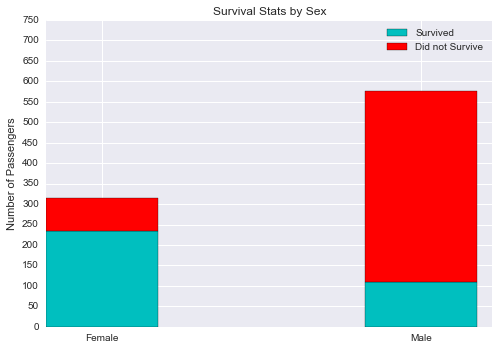

In [10]:
#画图
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
num_female_survived=len(female_survived) 
num_female_nonsurvived=len(female_passenger)-num_female_survived
num_male_survived=len(male_survived) 
num_male_nonsurvived=len(male_passenger)-num_male_survived

survivedMeans = (num_female_survived, num_male_survived)
nonsurvivedMeans = (num_female_nonsurvived, num_male_nonsurvived)

ind = np.arange(2)  
width = 0.35       

p1 = plt.bar(ind, survivedMeans, width, color='c')
p2 = plt.bar(ind, nonsurvivedMeans, width, color='r',
             bottom=survivedMeans)

plt.ylabel('Number of Passengers')
plt.title('Survival Stats by Sex')
plt.xticks(ind + width/2., ('Female', 'Male'))
plt.yticks(np.arange(0, 800, 50))
plt.legend((p1[0], p2[0]), ('Survived', 'Did not Survive'))


#### 从我美丽大方直观的图，可以清晰地看出男女存活率的差异。

### 4.3 存活率同舱位等级有无关系？

In [13]:
#找到各舱位的人数
num_of_fclass= len(passenger_info[passenger_info['Pclass'] ==1])
num_of_sclass= len(passenger_info[passenger_info['Pclass'] ==2])
num_of_tclass= len(passenger_info[passenger_info['Pclass'] ==3])
#找出各舱位幸存者
num_of_fclass_who_survived= len(passenger_info[(passenger_info['Pclass'] == 1) & (passenger_info['Survived'] == 1)])
num_of_sclass_who_survived= len(passenger_info[(passenger_info['Pclass'] == 2) & (passenger_info['Survived'] == 1)])
num_of_tclass_who_survived= len(passenger_info[(passenger_info['Pclass'] == 3) & (passenger_info['Survived'] == 1)])

num_of_fclass_who_dintsurvive= num_of_fclass-num_of_fclass_who_survived
num_of_sclass_who_dintsurvive= num_of_sclass-num_of_sclass_who_survived 
num_of_tclass_who_dintsurvive= num_of_tclass-num_of_tclass_who_survived

print '{} = {}'.format('num_of_fclass', num_of_fclass)
print '{} = {}'.format('num_of_sclass', num_of_sclass)
print '{} = {}'.format('num_of_tclass', num_of_tclass)
print '{} = {}'.format('num_of_fclass_who_survived', num_of_fclass_who_survived)
print '{} = {}'.format('num_of_sclass_who_survived', num_of_sclass_who_survived)
print '{} = {}'.format('num_of_tclass_who_survived', num_of_tclass_who_survived)
print '{} = {}'.format('num_of_fclass_who_dintsurvive ', num_of_fclass_who_dintsurvive )
print '{} = {}'.format('num_of_sclass_who_dintsurvive',  num_of_sclass_who_dintsurvive)
print '{} = {}'.format('num_of_tclass_who_dintsurvive', num_of_tclass_who_dintsurvive)
#计算各舱存活率
percent_fclass_who_survived = num_of_fclass_who_survived*1.0/num_of_fclass * 100
percent_sclass_who_survived = num_of_sclass_who_survived*1.0/num_of_sclass * 100
percent_tclass_who_survived = num_of_tclass_who_survived*1.0/num_of_tclass * 100

print '{} = {}'.format('percent_fclass_who_survived', percent_fclass_who_survived)
print '{} = {}'.format('percent_sclass_who_survived', percent_sclass_who_survived)
print '{} = {}'.format('percent_tclass_who_survived', percent_tclass_who_survived)

num_of_fclass = 216
num_of_sclass = 184
num_of_tclass = 491
num_of_fclass_who_survived = 136
num_of_sclass_who_survived = 87
num_of_tclass_who_survived = 119
num_of_fclass_who_dintsurvive  = 80
num_of_sclass_who_dintsurvive = 97
num_of_tclass_who_dintsurvive = 372
percent_fclass_who_survived = 62.962962963
percent_sclass_who_survived = 47.2826086957
percent_tclass_who_survived = 24.2362525458


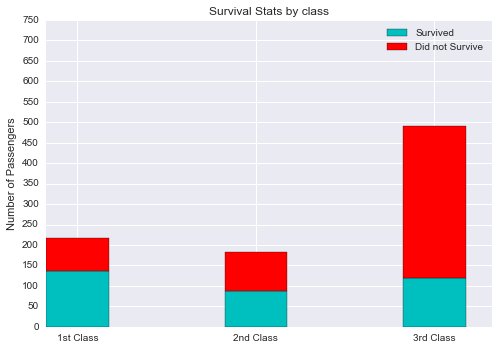

In [17]:
#作图
import numpy as np
import matplotlib.pyplot as plt


N = 3
survivedMeans = (num_of_fclass_who_survived, num_of_sclass_who_survived, num_of_tclass_who_survived)
notsurvivedMeans = (num_of_fclass_who_dintsurvive, num_of_sclass_who_dintsurvive, num_of_tclass_who_dintsurvive)

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, survivedMeans, width, color='c')
p2 = plt.bar(ind, notsurvivedMeans, width, color='r',
             bottom=survivedMeans)

plt.ylabel('Number of Passengers')
plt.title('Survival Stats by class')
plt.xticks(ind + width/2., ('1st Class', '2nd Class', '3rd Class'))
plt.yticks(np.arange(0, 800, 50))
plt.legend((p1[0], p2[0]), ('Survived', 'Did not Survive'))

In [15]:
#相关性检验
print np.corrcoef(passenger_info['Pclass'],passenger_info['Survived'])

[[ 1.         -0.33848104]
 [-0.33848104  1.        ]]


#### 相关性处于-0.3~-0.5之间，为负相关，相关性中等。

## Conclusions 结论